In [1]:
# データ分析に必要なライブラリを読み込む
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# font設定
%pip install japanize-matplotlib
import japanize_matplotlib 
sns.set(font='IPAexGothic')
matplotlib.rcParams["font.family"] = "IPAexGothic"

Note: you may need to restart the kernel to use updated packages.


In [2]:
key_image = pd.read_csv("/workspace/walkAnalysis/pointData/keyImage.csv")

key_image

,Front,Time,Side,Time.1
0,右踵接地,5.10,左踵接地,3.34
1,右全足底接地,5.20,左全足底接地,3.47
2,左足趾離地,5.34,対側足趾離地,3.60
3,左踵接地,5.74,対側踵接地,4.04
4,左全足底接地,5.87,対側全足底接地,4.17
5,右足趾離地,5.90,左足趾離地,4.24
6,右踵接地(2回目),6.34,左踵接地(2回目),4.67
7,右全足底接地,6.47,右踵接地,10.34
8,左足趾離地(2回目),6.54,右全足底接地,10.44
9,左踵接地(2回目),6.97,対側足趾離地,10.54


In [57]:
front = pd.read_csv("/workspace/walkAnalysis/pointData/frontTrim.csv")

front = front[(front['t'] >= 5.10) & (front['t'] <= 6.97)]
front.head()

,t,R_shoulder_x,R_shoulder_y,L_shoulder_x,L_shoulder_y,R_asis_x,R_asis_y,L_asis_x,L_asis_y,R_knee_x,R_knee_y,L_knee_x,L_knee_y,R_foot_x,R_foot_y,L_foot_x,L_foot_y
0,5.14,-123.98,167.38,18.45,162.79,-113.57,-10.49,-4.45,-4.84,-97.83,-182.18,-27.57,-179.59,-95.89,-325.78,-40.76,-307.55
1,5.17,-124.98,168.38,17.45,161.80,-114.58,-10.49,-5.45,-6.84,-97.82,-184.17,-27.55,-181.59,-94.29,-331.05,-40.76,-307.55
2,5.20,-124.98,170.38,15.45,162.80,-116.58,-10.49,-7.44,-7.84,-98.81,-184.19,-26.57,-188.61,-94.66,-334.34,-39.76,-307.55
3,5.24,-132.98,167.38,14.13,164.80,-118.56,-7.49,-8.44,-7.84,-100.82,-184.20,-26.58,-189.61,-93.44,-335.33,-40.76,-301.22
4,5.27,-133.97,172.38,12.51,168.42,-120.55,-3.49,-9.44,-6.84,-101.84,-182.20,-26.59,-189.61,-93.45,-335.33,-37.94,-295.30


In [4]:
# 各行に対する角度を計算して新しいカラムに格納
for index, row in front.iterrows():
    point1 = np.array([row['R_shoulder_x'], row['R_shoulder_y']])
    point2 = np.array([row['L_shoulder_x'], row['L_shoulder_y']])  # X軸上の点（原点と仮定）

    vector = point2 - point1
    x_axis_vector = np.array([1, 0])

    angle_rad = np.arccos(np.dot(vector, x_axis_vector) / (np.linalg.norm(vector) * np.linalg.norm(x_axis_vector)))
    angle_deg = np.degrees(angle_rad)

    front['Shoulder Angle'] = angle_deg

front.head()

,t,R_shoulder_x,R_shoulder_y,L_shoulder_x,L_shoulder_y,R_asis_x,R_asis_y,L_asis_x,L_asis_y,R_knee_x,R_knee_y,L_knee_x,L_knee_y,R_foot_x,R_foot_y,L_foot_x,L_foot_y,Shoulder Angle
0,5.14,-123.98,167.38,18.45,162.79,-113.57,-10.49,-4.45,-4.84,-97.83,-182.18,-27.57,-179.59,-95.89,-325.78,-40.76,-307.55,0.900846
1,5.17,-124.98,168.38,17.45,161.80,-114.58,-10.49,-5.45,-6.84,-97.82,-184.17,-27.55,-181.59,-94.29,-331.05,-40.76,-307.55,0.900846
2,5.20,-124.98,170.38,15.45,162.80,-116.58,-10.49,-7.44,-7.84,-98.81,-184.19,-26.57,-188.61,-94.66,-334.34,-39.76,-307.55,0.900846
3,5.24,-132.98,167.38,14.13,164.80,-118.56,-7.49,-8.44,-7.84,-100.82,-184.20,-26.58,-189.61,-93.44,-335.33,-40.76,-301.22,0.900846
4,5.27,-133.97,172.38,12.51,168.42,-120.55,-3.49,-9.44,-6.84,-101.84,-182.20,-26.59,-189.61,-93.45,-335.33,-37.94,-295.30,0.900846


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


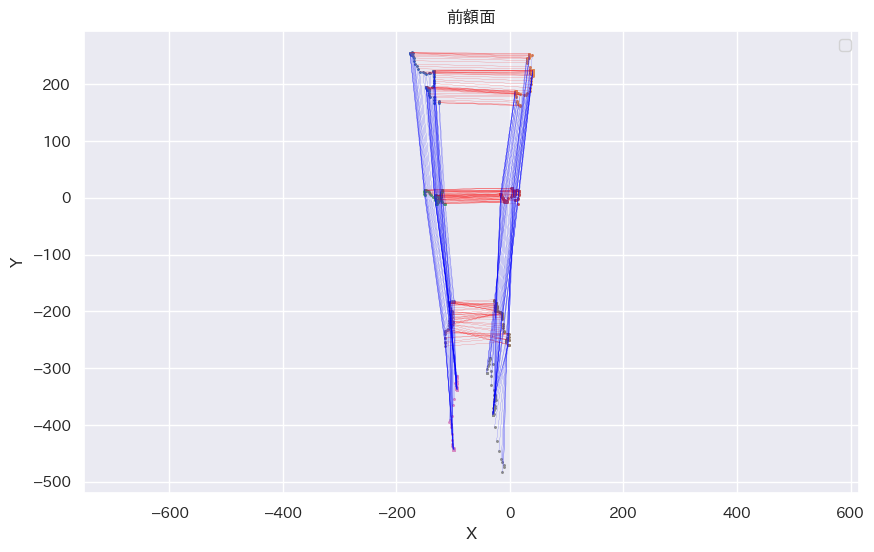

In [17]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('前額面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','knee','foot']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(front[f'R_{landmark}_x'], front[f'R_{landmark}_y'],  marker='.', s=5)
  plt.scatter(front[f'L_{landmark}_x'], front[f'L_{landmark}_y'],  marker='.', s=5)
  
  # 各点をつなぐ線を描画
  for i in range(len(front[f'R_{landmark}_x'])):
      if landmark == 'foot':
          break
      plt.plot([front[f'R_{landmark}_x'][i], front[f'L_{landmark}_x'][i]],
              [front[f'R_{landmark}_y'][i], front[f'L_{landmark}_y'][i]],
              color='red', linestyle='-', linewidth=0.1)

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(front[f'R_{landmark}_x'])):
        plt.plot([front[f'R_{landmark}_x'][i], front[f'R_{previous_landmark}_x'][i]],
                [front[f'R_{landmark}_y'][i], front[f'R_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)
        
        plt.plot([front[f'L_{landmark}_x'][i], front[f'L_{previous_landmark}_x'][i]],
        [front[f'L_{landmark}_y'][i], front[f'L_{previous_landmark}_y'][i]],
        color='blue', linestyle='-', linewidth=0.1)
    
    previous_landmark = landmark



In [51]:
right_side = pd.read_csv("/workspace/walkAnalysis/pointData/sideRightTrim.csv")

right_side = right_side[(right_side['t'] >= 10.34) & (right_side['t'] <= 11.54)]
right_side.head()

,t,R_shoulder_x,R_shoulder_y,R_asis_x,R_asis_y,R_hip_x,R_hip_y,R_knee_x,R_knee_y,R_leg_x,R_leg_y,R_ancle_x,R_ancle_y,R_heel_x,R_heel_y,R_toe_x,R_toe_y
0,10.38,-843.92,249.79,-794.35,7.31,-839.82,-52.78,-742.97,-229.30,-746.17,-251.38,-679.58,-413.24,-678.50,-437.06,-624.36,-425.15
1,10.41,-827.92,246.80,-775.36,5.32,-819.82,-53.79,-722.96,-230.30,-727.17,-251.38,-672.58,-413.24,-673.50,-437.06,-612.27,-431.65
2,10.44,-810.92,245.79,-756.35,5.33,-798.82,-52.30,-701.96,-229.29,-707.17,-251.37,-666.58,-413.22,-669.49,-437.07,-608.59,-442.41
3,10.48,-793.92,245.79,-736.36,8.34,-776.81,-50.78,-683.96,-228.29,-683.59,-246.04,-659.25,-416.46,-668.49,-438.06,-605.17,-443.39
4,10.51,-776.92,246.79,-717.36,11.33,-754.80,-46.79,-665.54,-225.81,-669.34,-247.13,-662.58,-413.20,-667.50,-438.06,-605.17,-443.41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


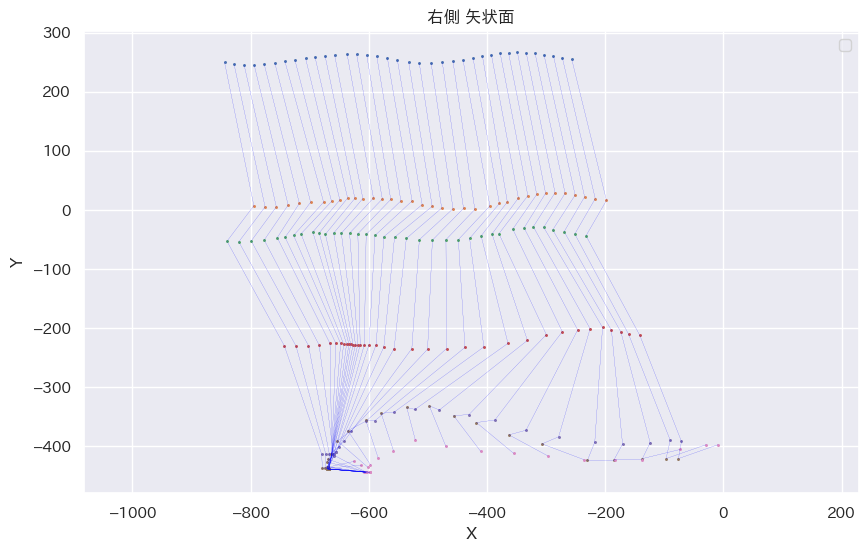

In [52]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('右側 矢状面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','hip','knee','ancle','heel','toe']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(right_side[f'R_{landmark}_x'], right_side[f'R_{landmark}_y'],  marker='.', s=5)

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(right_side[f'R_{landmark}_x'])):
        plt.plot([right_side[f'R_{landmark}_x'][i], right_side[f'R_{previous_landmark}_x'][i]],
                [right_side[f'R_{landmark}_y'][i], right_side[f'R_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)

    
    previous_landmark = landmark

In [54]:
left_side = pd.read_csv("/workspace/walkAnalysis/pointData/sideLeftTrim.csv")

left_side = left_side[(left_side['t'] >= 3.34) & (left_side['t'] <= 4.67)]
left_side.head()

,t,L_ancle_x,L_ancle_y,L_heel_x,L_heel_y,L_toe_x,L_toe_y,L_leg_x,L_leg_y,L_knee_x,L_knee_y,L_hip_x,L_hip_y,L_asis_x,L_asis_y,L_shoulder_x,L_shoulder_y
0,3.37,345.83,-389.40,348.67,-422.05,290.12,-404.02,374.13,-219.73,373.50,-208.10,461.05,-28.42,423.92,24.78,482.62,263.05
1,3.40,340.85,-392.40,346.68,-422.04,286.27,-414.14,365.13,-223.73,364.51,-208.11,448.05,-31.42,411.91,22.79,473.61,261.06
2,3.44,335.85,-393.42,344.67,-422.07,283.43,-420.21,355.13,-224.73,356.51,-208.11,433.05,-32.42,399.90,21.81,463.61,259.05
3,3.47,333.84,-394.43,346.74,-423.04,281.51,-423.25,344.52,-228.60,346.51,-208.12,415.05,-31.42,387.91,22.83,452.61,256.05
4,3.50,332.82,-395.43,346.74,-422.06,279.51,-424.23,338.52,-228.60,338.59,-209.75,409.29,-30.42,375.92,24.85,441.62,254.05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


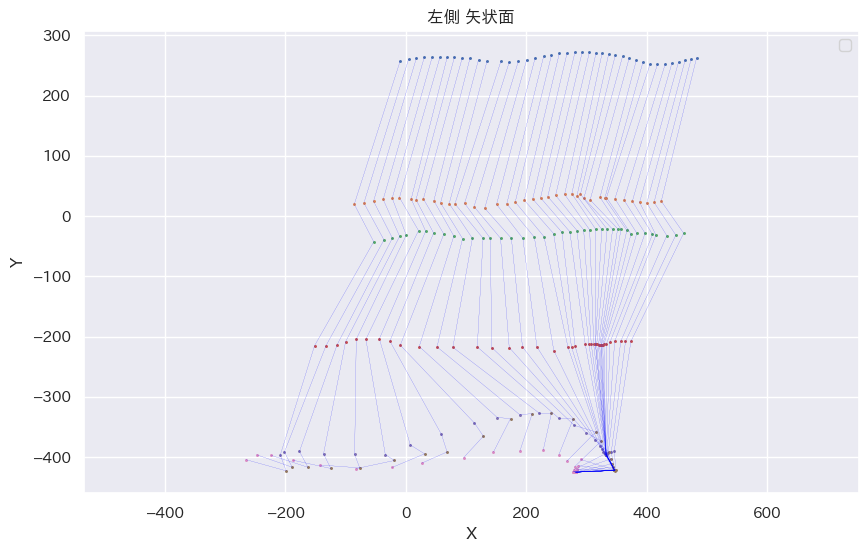

In [56]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.title('左側 矢状面')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)

landamrks = ['shoulder','asis','hip','knee','ancle','heel','toe']

previous_landmark = None

for landmark in landamrks:
  plt.scatter(left_side[f'L_{landmark}_x'], left_side[f'L_{landmark}_y'],  marker='.', s=5)

  if previous_landmark == None:
    previous_landmark = landmark
  
  else:
    # 各点をつなぐ線を描画
    for i in range(len(left_side[f'L_{landmark}_x'])):
        plt.plot([left_side[f'L_{landmark}_x'][i], left_side[f'L_{previous_landmark}_x'][i]],
                [left_side[f'L_{landmark}_y'][i], left_side[f'L_{previous_landmark}_y'][i]],
                color='blue', linestyle='-', linewidth=0.1)

    
    previous_landmark = landmark